In [236]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
from ipywidgets import interact
import scipy.stats as stats

In [237]:
# Load in csv
athelete_df = pd.read_csv("Raw Data/athlete_events.csv")
athelete_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [238]:
athelete_df['Medal'].fillna('DNW', inplace = True)
athelete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [239]:
# Load in csv
NOC_df = pd.read_csv("Raw Data/noc_regions.csv")
NOC_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [240]:
# Merge the dataframes
athelete_merged_df = pd.merge(athelete_df,NOC_df,on='NOC',how='left')
athelete_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


In [241]:
athelete_merged_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NaN


In [242]:
# Function to update the pie chart based on selected year
def update_pie_chart(year):
    # Filter the DataFrame based on the selected year
    filtered_df = athelete_merged_df[athelete_merged_df['Year'] == year]
    
    # Group the data by some category (e.g., 'Sport') and count the occurrences
    data = filtered_df['Sex'].value_counts()
    
    # Plot the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Sport Distribution in {year}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show() 

# Get unique years from the DataFrame
years = np.sort(athelete_merged_df['Year'].unique())
years

# Create a slider widget for selecting years
interact(update_pie_chart, year=years)

interactive(children=(Dropdown(description='year', options=(1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 19…

<function __main__.update_pie_chart(year)>

In [243]:
# Number of participants grouped by Sex, Year and Medal
winners_df = athelete_merged_df[athelete_merged_df['Medal'] !='DNW'].groupby(['Year'])['Sex'].value_counts()
winners_df = pd.DataFrame(winners_df).reset_index()
winners_df.head()


,Year,Sex,count
0,1896,M,143
1,1900,M,591
2,1900,F,13
3,1904,M,476
4,1904,F,10


In [244]:
x_axis_data = winners_df['Year']
male_df = winners_df[winners_df['Sex']=='M']
female_df = winners_df[winners_df['Sex']=='F']
#male_df

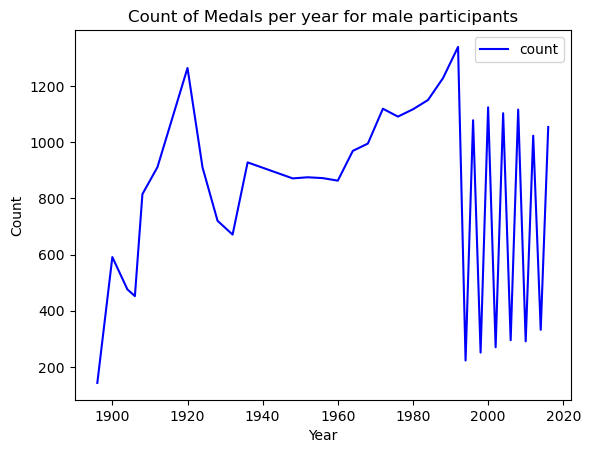

In [245]:
male_df.plot(kind='line', x='Year',y='count',c='b')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Medals per year for male participants')
plt.grid(False)  # Optional: Add gridlines
plt.show()

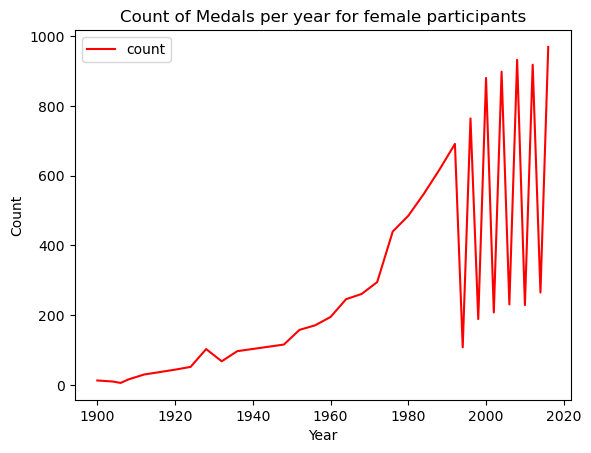

In [246]:
female_df.plot(kind='line', x='Year',y='count',c='r')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Medals per year for female participants')
plt.grid(False)  # Optional: Add gridlines
plt.show()

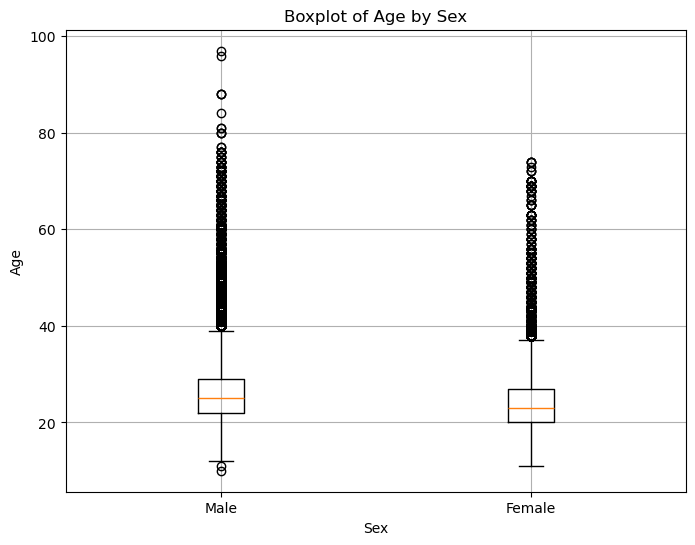

In [247]:
# Generate a box plot that shows the distrubution of the total male and female participants.
athelete_clean_df = athelete_merged_df[athelete_merged_df['Age'].notnull()]
plt.figure(figsize=(8, 6))

plt.boxplot([athelete_clean_df[athelete_clean_df['Sex'] == 'M']['Age'], 
             athelete_clean_df[athelete_clean_df['Sex'] == 'F']['Age']], 
            labels=['Male', 'Female'])

# Add labels and title
plt.title('Boxplot of Age by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.xticks(rotation=0)
plt.grid(None)
plt.show()

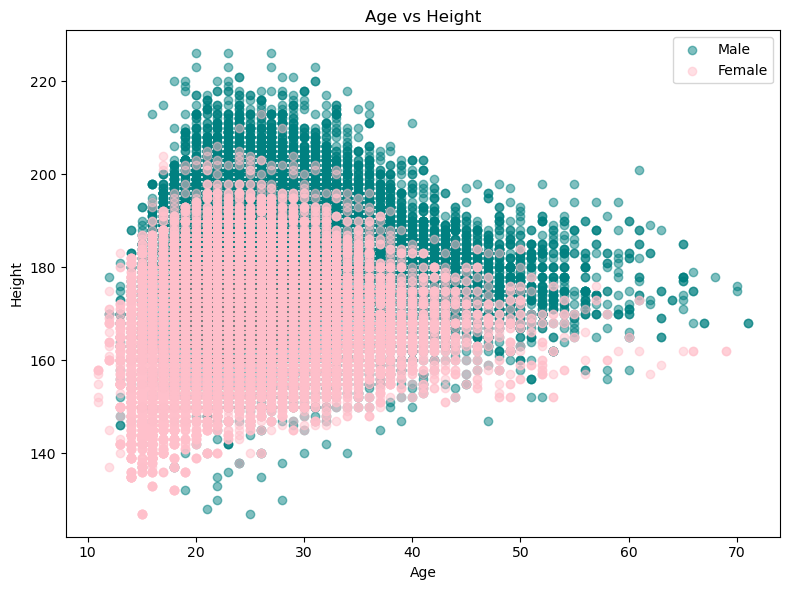

In [248]:
category_male = athelete_merged_df[athelete_merged_df['Sex'] == 'M']
category_female = athelete_merged_df[athelete_merged_df['Sex'] == 'F']

# Plot the scatter plot with different markers or colors for each category
plt.figure(figsize=(8, 6))
plt.scatter(category_male['Age'], category_male['Height'], color='teal', label='Male', alpha = 0.5)
plt.scatter(category_female['Age'], category_female['Height'], color='pink', label='Female',  alpha = 0.5)

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Height')
plt.title('Age vs Height')
plt.legend()

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()

In [249]:
athelete_winners_df = athelete_merged_df[athelete_merged_df['Medal']!='DNW']
athelete_gold_winners_summer_df = athelete_winners_df[(athelete_winners_df['Season']=='Summer') & (athelete_winners_df['Medal']=='Gold')]
athelete_gold_winners_winter_df = athelete_winners_df[(athelete_winners_df['Season']=='Winter') & (athelete_winners_df['Medal']=='Gold')]

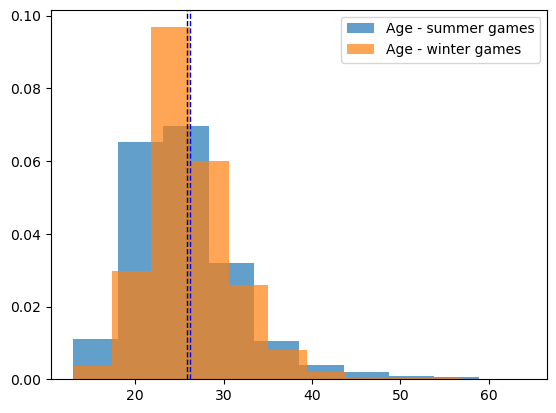

In [250]:
plt.hist(athelete_gold_winners_summer_df['Age'], 10, density=True, alpha=0.7, label="Age - summer games")
plt.hist(athelete_gold_winners_winter_df['Age'], 10, density=True, alpha=0.7, label="Age - winter games")
plt.axvline(athelete_gold_winners_summer_df['Age'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(athelete_gold_winners_winter_df['Age'].mean(), color='b', linestyle='dashed', linewidth=1)
plt.legend()  

In [251]:
athelete_participants_df = athelete_merged_df[athelete_merged_df['Medal']=='DNW']

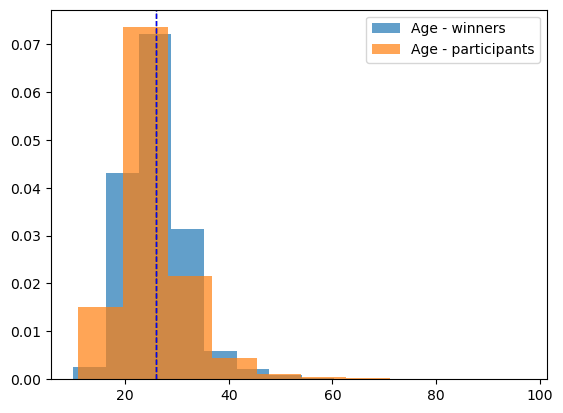

In [252]:
plt.hist(athelete_winners_df['Age'], 10, density=True, alpha=0.7, label="Age - winners")
plt.hist(athelete_participants_df['Age'], 10, density=True, alpha=0.7, label="Age - participants")
plt.axvline(athelete_winners_df['Age'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(athelete_winners_df['Age'].mean(), color='b', linestyle='dashed', linewidth=1)
plt.legend()  

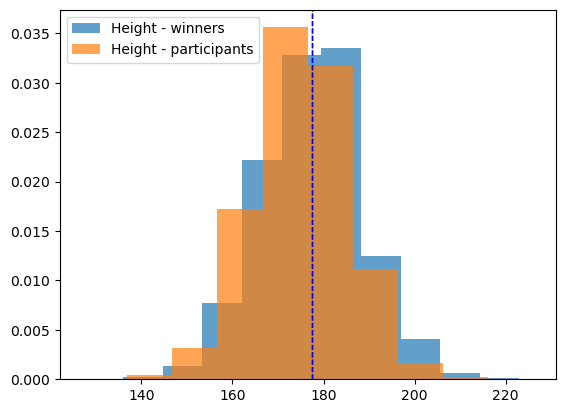

In [253]:
plt.hist(athelete_winners_df['Height'], 10, density=True, alpha=0.7, label="Height - winners")
plt.hist(athelete_participants_df['Height'], 10, density=True, alpha=0.7, label="Height - participants")
plt.axvline(athelete_winners_df['Height'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(athelete_winners_df['Height'].mean(), color='b', linestyle='dashed', linewidth=1)
plt.legend()  

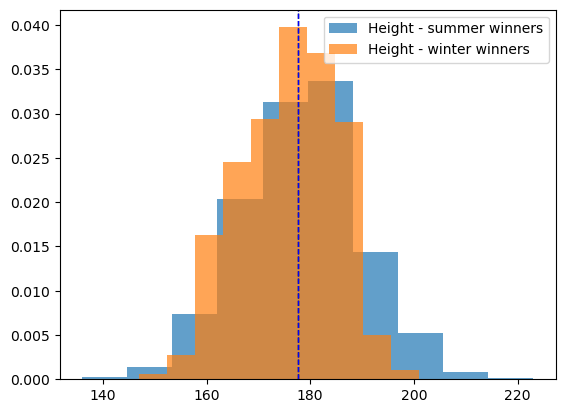

In [254]:
plt.hist(athelete_gold_winners_summer_df['Height'], 10, density=True, alpha=0.7, label="Height - summer winners")
plt.hist(athelete_gold_winners_winter_df['Height'], 10, density=True, alpha=0.7, label="Height - winter winners")
plt.axvline(athelete_winners_df['Height'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(athelete_winners_df['Height'].mean(), color='b', linestyle='dashed', linewidth=1)
plt.legend()  

In [255]:
# dropm notes column
athelete_winners_df = athelete_winners_df.drop(columns='notes')

In [256]:
# cleanup
athelete_winners_df =  athelete_winners_df.dropna(how='any')

#Medal winners
gold_athletics = athelete_winners_df[(athelete_winners_df['Sport']=='Athletics') & (athelete_winners_df['Medal']=='Gold')]
silver_athletics = athelete_winners_df[(athelete_winners_df['Sport']=='Athletics') & (athelete_winners_df['Medal']=='Silver')]
bronze_athletics = athelete_winners_df[(athelete_winners_df['Sport']=='Athletics') & (athelete_winners_df['Medal']=='Bronze')]
gold_athletics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
620,359,Andrey Khakimovich Abduvaliyev,M,26.0,190.0,125.0,Unified Team,EUN,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's Hammer Throw,Gold,Russia
720,411,Gezahgne Abera,M,22.0,166.0,58.0,Ethiopia,ETH,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Marathon,Gold,Ethiopia
787,454,"Edgar Allen ""Ed"" Ablowich",M,19.0,182.0,68.0,United States,USA,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Men's 4 x 400 metres Relay,Gold,USA
915,519,Harold Maurice Abrahams,M,24.0,183.0,75.0,Great Britain,GBR,1924 Summer,1924,Summer,Paris,Athletics,Athletics Men's 100 metres,Gold,UK
1511,836,Platt Adams,M,27.0,188.0,78.0,United States,USA,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's Standing High Jump,Gold,USA


In [257]:
#non winners
athelete_non_winners_df = athelete_merged_df[(athelete_merged_df['Medal']=='DNW') & (athelete_merged_df['Sport']=='Athletics')]
athelete_non_winners_df = athelete_non_winners_df.drop(columns='notes')
athelete_non_winners_df =  athelete_non_winners_df.dropna(how='any')
athelete_non_winners_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
57,18,Timo Antero Aaltonen,M,31.0,189.0,130.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,DNW,Finland
94,31,Evald rma (rman-),M,24.0,174.0,70.0,Estonia,EST,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Pole Vault,DNW,Estonia
98,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.0,76.0,France,FRA,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",DNW,France
130,47,Erling Rudolf Aastad,M,22.0,177.0,74.0,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Athletics,Athletics Men's 4 x 100 metres Relay,DNW,Norway
131,47,Erling Rudolf Aastad,M,22.0,177.0,74.0,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Athletics,Athletics Men's Long Jump,DNW,Norway


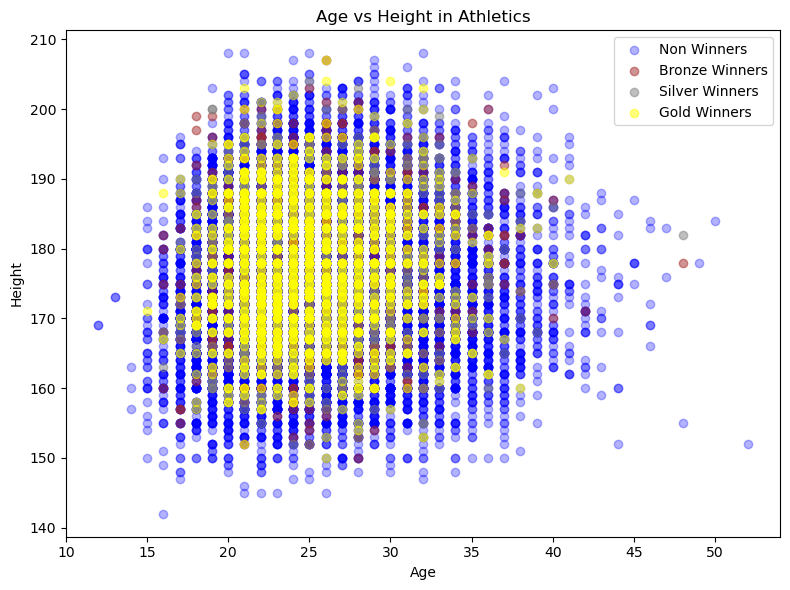

In [258]:
# Plot the scatter plot with different markers or colors for each category
plt.figure(figsize=(8, 6))
plt.scatter(athelete_non_winners_df['Age'], athelete_non_winners_df['Height'], color='blue', label='Non Winners', alpha = 0.3)
plt.scatter(bronze_athletics['Age'], bronze_athletics['Height'], color='brown', label='Bronze Winners', alpha = 0.5)
plt.scatter(silver_athletics['Age'], silver_athletics['Height'], color='grey', label='Silver Winners', alpha = 0.5)
plt.scatter(gold_athletics['Age'], gold_athletics['Height'], color='yellow', label='Gold Winners', alpha = 0.5)

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Height')
plt.title('Age vs Height in Athletics')
plt.legend()

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()

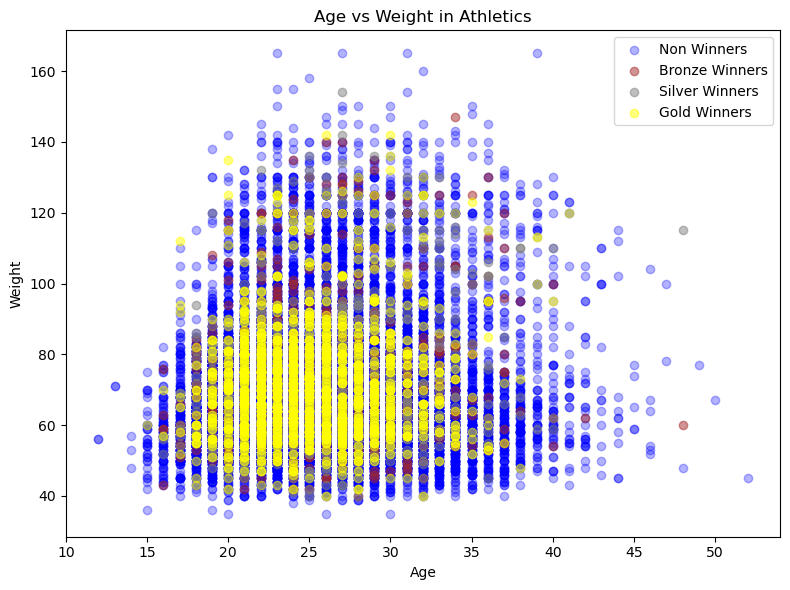

In [259]:
# Plot the scatter plot with different markers or colors for each category
plt.figure(figsize=(8, 6))
plt.scatter(athelete_non_winners_df['Age'], athelete_non_winners_df['Weight'], color='blue', label='Non Winners', alpha = 0.3)
plt.scatter(bronze_athletics['Age'], bronze_athletics['Weight'], color='brown', label='Bronze Winners', alpha = 0.5)
plt.scatter(silver_athletics['Age'], silver_athletics['Weight'], color='grey', label='Silver Winners', alpha = 0.5)
plt.scatter(gold_athletics['Age'], gold_athletics['Weight'], color='yellow', label='Gold Winners', alpha = 0.5)

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Age vs Weight in Athletics')
plt.legend()

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()

In [262]:
stats.ttest_1samp(gold_athletics['Age'], athelete_non_winners_df['Age'].mean())

TtestResult(statistic=-3.1358495400623485, pvalue=0.0017522513052340082, df=1291)

In [263]:
stats.ttest_1samp(gold_athletics['Height'], athelete_non_winners_df['Height'].mean())

TtestResult(statistic=7.001434694328108, pvalue=4.063172966048124e-12, df=1291)

In [264]:
stats.ttest_1samp(gold_athletics['Weight'], athelete_non_winners_df['Weight'].mean())

TtestResult(statistic=6.381307326892645, pvalue=2.4419997426811523e-10, df=1291)

In [265]:
stats.ttest_ind(gold_athletics['Height'], athelete_non_winners_df['Height'], equal_var=False)

TtestResult(statistic=6.844116027193385, pvalue=1.1431379569483752e-11, df=1413.7177688715158)

In [266]:
stats.ttest_ind(gold_athletics['Age'], athelete_non_winners_df['Age'], equal_var=False)

TtestResult(statistic=-3.0495404291432227, pvalue=0.002333635950827672, df=1443.2619177164695)

In [267]:
stats.ttest_ind(gold_athletics['Weight'], athelete_non_winners_df['Weight'], equal_var=False)

TtestResult(statistic=6.248491767078032, pvalue=5.483726173057345e-10, df=1404.1969299476407)